### Supervised Learning ###

#### A- Linear Regression ####

#### Basit Linear Regression ####

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as scipty

In [140]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [20]:
correlation=df.corr()
correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


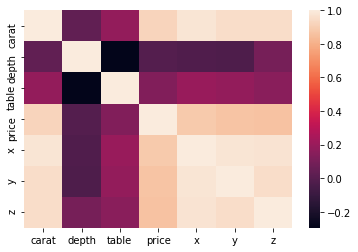

In [22]:
sns.heatmap(correlation);

<AxesSubplot:xlabel='carat', ylabel='price'>

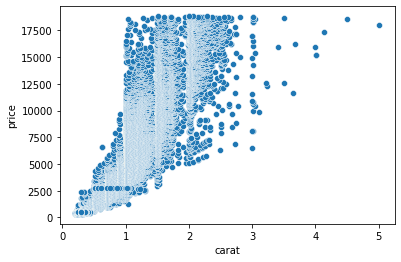

In [35]:
sns.scatterplot(x='carat', y='price', data=df)

<AxesSubplot:xlabel='carat', ylabel='price'>

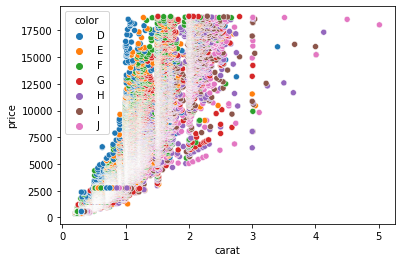

In [33]:
sns.scatterplot(x='carat', y='price', hue='color', data=df)

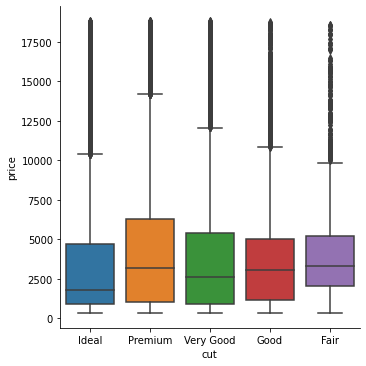

In [29]:
sns.catplot(x='cut', y='price', data=df, kind='box');

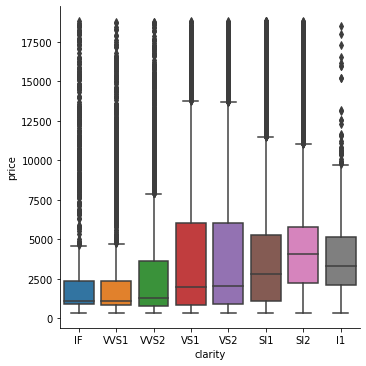

In [31]:
sns.catplot(x='clarity', y='price', data=df, kind='box');

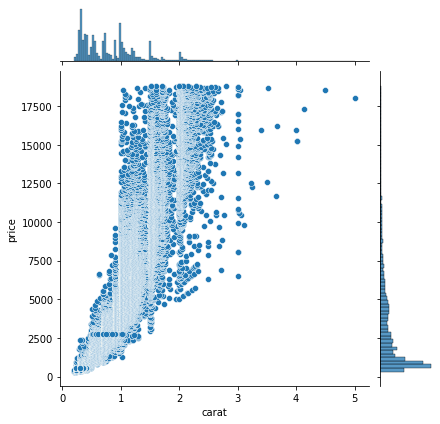

In [38]:
sns.jointplot(x='carat', y='price', data=df);

In [43]:
import statsmodels.api as sm

In [46]:
X=df[['carat']]
y=df[['price']]

In [47]:
X[:5]

,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31


In [48]:
y[:5]

,price
0,326
1,326
2,327
3,334
4,335


We add 1 because we have one variable and then want to calculate matrix.

In [49]:
X=sm.add_constant(X)

In [50]:
X

,const,carat
0,1.0,0.23
1,1.0,0.21
2,1.0,0.23
3,1.0,0.29
4,1.0,0.31
...,...,...
53935,1.0,0.72
53936,1.0,0.72
53937,1.0,0.70
53938,1.0,0.86


Create a model 

Method-1

In [52]:
model=sm.OLS(y,X).fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:27:19   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
model.params

const   -2256.360580
carat    7756.425618
dtype: float64

In [59]:
model.conf_int()

,0,1
const,-2281.949168,-2230.771992
carat,7728.855012,7783.996224


In [63]:
model.f_pvalue

0.0

In [64]:
model.fvalue

304050.905940556

Method-2

In [54]:
import statsmodels.formula.api as smf

In [55]:
model_2=smf.ols('price~carat',df).fit()

In [56]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:33:40   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model.mse_model

729127440119.7119

In [66]:
model.rsquared

0.8493305264354857

In [67]:
model.rsquared_adj

0.8493277330528322

predic values and real values

In [69]:
model.fittedvalues[:10]

0   -472.382688
1   -627.511200
2   -472.382688
3     -6.997151
4    148.131362
5   -394.818432
6   -394.818432
7   -239.689919
8   -549.946944
9   -472.382688
dtype: float64

In [72]:
y[:10]

,price
0,326
1,326
2,327
3,334
4,335
5,336
6,336
7,337
8,337
9,338


predic formula

In [74]:
price_price=model.params[0]+df['carat']*model.params[1]
price_price

0        -472.382688
1        -627.511200
2        -472.382688
3          -6.997151
4         148.131362
            ...     
53935    3328.265865
53936    3328.265865
53937    3173.137353
53938    4414.165451
53939    3560.958633
Name: carat, Length: 53940, dtype: float64

In [78]:
print(str(model.params[0]) + ' + carat * '+str(model.params[1]))

-2256.360580045415 + carat * 7756.425617968431


Method-3

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
X=df[['carat']]
y=df[['price']]

In [84]:
model_3=LinearRegression().fit(X,y)

In [87]:
model_3.score(X,y)

0.8493305264354858

In [88]:
model_3.coef_

array([[7756.42561797]])

In [89]:
model_3.intercept_

array([-2256.36058005])

In [93]:
model_3.predict(X)

array([[-472.38268791],
       [-627.51120027],
       [-472.38268791],
       ...,
       [3173.13735253],
       [4414.16545141],
       [3560.95863343]])

In [94]:
model_3.predict([[10]])

array([[75307.89559964]])

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:57:06   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
mse=mean_squared_error(y, model.fittedvalues)

In [99]:
mse

2397955.0500126793

In [102]:
rmse=np.sqrt(mse)
rmse

1548.5331930613174

In [106]:
predict_y=LinearRegression().fit(X,y).predict(X)
predict_y

array([[-472.38268791],
       [-627.51120027],
       [-472.38268791],
       ...,
       [3173.13735253],
       [4414.16545141],
       [3560.95863343]])

In [107]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [109]:
error=y-predict_y
error

,price
0,798.382688
1,953.511200
2,799.382688
3,340.997151
4,186.868638
...,...
53935,-571.265865
53936,-571.265865
53937,-416.137353
53938,-1657.165451


In [110]:
squared_error=error**2
squared_error

,price
0,6.374149e+05
1,9.091836e+05
2,6.390127e+05
3,1.162791e+05
4,3.491989e+04
...,...
53935,3.263447e+05
53936,3.263447e+05
53937,1.731703e+05
53938,2.746197e+06


In [113]:
squared_er_sum=squared_error.sum()
squared_er_sum

price    1.293457e+11
dtype: float64

In [115]:
squared_er_sum_mean=squared_er_sum.mean()
squared_er_sum_mean

129345695397.68394

In [117]:
squared_er_sum_mean_sq=np.sqrt(squared_er_sum_mean)
squared_er_sum_mean_sq

359646.62572820554

In [119]:
model.resid

0         798.382688
1         953.511200
2         799.382688
3         340.997151
4         186.868638
            ...     
53935    -571.265865
53936    -571.265865
53937    -416.137353
53938   -1657.165451
53939    -803.958633
Length: 53940, dtype: float64

### Multiple Linear Regression ###

In [132]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [141]:
df=pd.concat([df, pd.get_dummies(df["cut"],prefix="cut")], axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0,0,1,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,1,0,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0,0,0,1,0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,1,0,0,0


In [142]:
df=pd.concat([df, pd.get_dummies(df["color"],prefix="color")], axis=1)
df=pd.concat([df, pd.get_dummies(df["clarity"],prefix="clarity")], axis=1)

In [143]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,0,0,0,1,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,0,0,0,1,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,1,0,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,0,0,0,1,0,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,0,0,0,0,0,0,0,1,0,0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,0,0,0,0,0,0,0,1,0,0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,0,0,0,0,0,0,0,1,0,0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,0,0,0,0,0,0,0,0,1,0


In [144]:
df.drop(['cut'], axis=1, inplace=True)

In [146]:
df.drop(['color'],axis=1, inplace=True)

In [147]:
df.drop(['clarity'],axis=1, inplace=True)

In [148]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [164]:
X=df.drop('price', axis=1)
y=df['price']

In [165]:
X[:5]

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [166]:
y[:5]

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [167]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=42)

In [168]:
X_train.shape

(43152, 26)

In [169]:
X_test.shape

(10788, 26)

In [170]:
y_train.shape

(43152,)

In [171]:
y_test.shape

(10788,)

Create a model

Method-1

In [172]:
models=LinearRegression().fit(X_train,y_train)

In [173]:
models.intercept_

-1650311044589434.2

In [174]:
models.coef_

array([ 1.12807843e+04, -6.50265658e+01, -2.72332986e+01, -1.01058260e+03,
       -2.79729049e+00, -3.37343573e+01,  2.46560544e+15,  2.46560544e+15,
        2.46560544e+15,  2.46560544e+15,  2.46560544e+15, -9.01680283e+14,
       -9.01680283e+14, -9.01680283e+14, -9.01680283e+14, -9.01680283e+14,
       -9.01680283e+14, -9.01680283e+14,  8.63858915e+13,  8.63858915e+13,
        8.63858915e+13,  8.63858915e+13,  8.63858915e+13,  8.63858915e+13,
        8.63858915e+13,  8.63858915e+13])

Method-2

In [175]:
models_2=sm.OLS(y_train,X_train).fit()

In [176]:
models_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.156e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:24:51   Log-Likelihood:            -3.6453e+05
No. Observations:               43152   AIC:                         7.291e+05
Df Residuals:                   43128   BIC:                         7.293e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat          1.128e+04     54.159    208.291      0.000    1.12e+04    1.14e+04
depth           -65.0910      4.996    -13.028      0.000     -74.884     -55.298
table           -26.6000      3.262     -8.154      0.000     -32.994     -20.206
x             -1008.0416     34.514    -29.207      0.000   -1075.690    -940.393
y                -3.5285     19.376     -0.182      0.856     -41.507      34.450
z               -36.4634     33.705     -1.082      0.279    -102.526      29.599
cut_Ideal      2761.1226    182.258     15.149      0.000    2403.893    3118.353
cut_Premium    2684.2349    186.753     14.373      0.000    2318.196    3050.274
cut_Very Good  2652.2589    186.877     14.193      0.000    2285.975    3018.542
cut_Good       2494.1039    190.993     13.059      0.000    2119.753    2868.454
cut_Fair       1902.3067    199.032      9.558      0.000    1512.200    2292.413
color_D        2619.7449    135.134     19.386      0.000    2354.880    2884.610
color_E        2401.5463    134.910     17.801      0.000    2137.121    2665.971
color_F        2340.0285    135.089     17.322      0.000    2075.252    2604.805
color_G        2124.1634    135.249     15.706      0.000    1859.073    2389.253
color_H        1620.6585    135.384     11.971      0.000    1355.303    1886.014
color_I        1140.1604    135.756      8.399      0.000     874.077    1406.244
color_J         247.7251    136.522      1.815      0.070     -19.860     515.310
clarity_IF     3107.7199    119.280     26.054      0.000    2873.929    3341.511
clarity_VVS1   2757.0682    118.483     23.270      0.000    2524.840    2989.296
clarity_VVS2   2699.9867    118.530     22.779      0.000    2467.666    2932.307
clarity_VS1    2321.6808    118.564     19.582      0.000    2089.293    2554.068
clarity_VS2    2005.3909    118.732     16.890      0.000    1772.675    2238.107
clarity_SI1    1417.1898    119.313     11.878      0.000    1183.334    1651.046
clarity_SI2     443.2153    119.211      3.718      0.000     209.559     676.871
clarity_I1    -2258.2247    127.082    -17.770      0.000   -2507.308   -2009.141
==============================================================================
Omnibus:                    11529.327   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           422755.106
Skew:                           0.598   Prob(JB):                         0.00
Kurtosis:                      18.287   Cond. No.                     1.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-24. This might indicate that there are
strong multicollinearity problems or that the design ma

#### Predict you, given features. ####

In [189]:
a=[[125],[52],[1],[5],[36],[12],[1],[0],[0],[0],[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[1],[0],[0],[0],[0],[0]]

In [191]:
a=pd.DataFrame(a).T

Predict it means price value.

In [192]:
models.predict(a)

array([1409241.75])

Prediction Success of the Model

#### Train Error ####

In [194]:
rmse=np.sqrt(mean_squared_error(y_train,models.predict(X_train)))

In [195]:
rmse

1128.574842195109

#### Test Error ####

In [198]:
rmse=np.sqrt(mean_squared_error(y_test,models.predict(X_test)))
rmse          

1135.1976055341613

Model Tunning

In [200]:
df.head(5)

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [203]:
X[:5]

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [204]:
y[:5]

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [209]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [210]:
model_new=LinearRegression().fit(X_train,y_train)

Find the train error of model

In [214]:
np.sqrt(mean_squared_error(y_train, model_new.predict(X_train)))

1128.574842195109

Find the r2 value.

In [217]:
model_new.score(X_train,y_train)

0.9199935881537463

If we change the random_state value,we look at that train error of model and r2 value change.

In [218]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=77)

In [219]:
np.sqrt(mean_squared_error(y_train, model_new.predict(X_train)))

1124.9443295986136

In [220]:
model_new.score(X_train,y_train)

0.9195726840146464

#### So how should we split the data? ####

Validation

In [224]:
cross_val_score(model_new,X_train,y_train, cv=10, scoring='r2').mean()

0.9193656716496458

In [225]:
model_new.score(X_train,y_train)

0.9195726840146464

These are error values of each values.

In [227]:
-cross_val_score(model_new,X_train,y_train, cv=10, scoring='neg_mean_squared_error')

array([1247960.9533567 , 1215118.98855409, 1234033.6608021 ,
       1218744.06983742, 1246037.25469852, 1145739.58290537,
       1356041.76525185, 1286223.8475514 , 1410214.86541264,
       1319027.04554291])

In [229]:
rmse=np.sqrt(-cross_val_score(model_new,X_train,y_train, cv=10, scoring='neg_mean_squared_error'))
rmse

array([1117.12172719, 1102.32435724, 1110.8706769 , 1103.96742245,
       1116.26038839, 1070.39225656, 1164.4920632 , 1134.11809242,
       1187.52467992, 1148.48902718])

Validation

In [230]:
np.sqrt(-cross_val_score(model_new,X_train,y_train, cv=10, scoring='neg_mean_squared_error')).mean()

1125.5560691444566

Our real test error score,a test error value is better than a train error value,and we always validate our data(train data and test data.)

In [231]:
np.sqrt(-cross_val_score(model_new,X_test,y_test, cv=10, scoring='neg_mean_squared_error')).mean()

1153.6725205917032